In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
df = pd.read_csv('ELNINO.csv')
df.head()

,Oscillation,Year + fraction,Year,Month
0,-0.7,1955.04,1955,1
1,1.3,1955.13,1955,2
2,0.1,1955.21,1955,3
3,-0.9,1955.29,1955,4
4,0.8,1955.38,1955,5


In [3]:
df.columns

Index(['Oscillation', ' Year + fraction ', 'Year', 'Month'], dtype='object')

In [4]:
df.shape

(456, 4)

# Run sequence plot

Text(0.5, 1.0, 'Run Sequence Pllot')

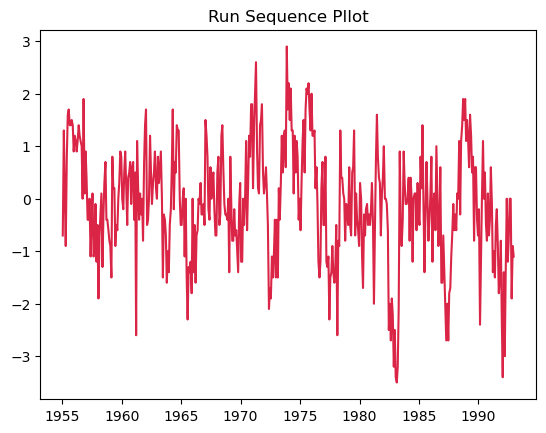

In [5]:
# sns.lineplot(data=df['Oscillation'], color='#db2547')
plt.plot(df[' Year + fraction '],df['Oscillation'],color='#db2547')
plt.title('Run Sequence Pllot')

In [6]:
X = df.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=983.766864, mean2=993.182215
variance1=961372.249653, variance2=980259.984597


In [7]:
print('Stationary data')

Stationary data


### Run sequence plot is used to display data points in a sequence over time.
### Conclusion : 
### 1. There is no cycle at regular interval
### 2. Persistent upward or downward trends also indicate positive autocorrelation.

# Autocorelation Plot

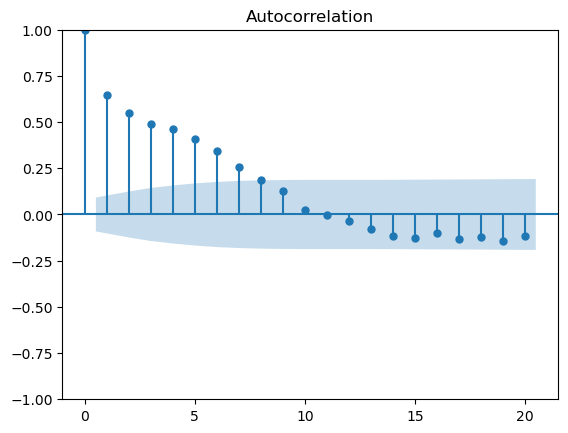

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Oscillation'],lags=20)
plt.show()

# Plot using differenced data

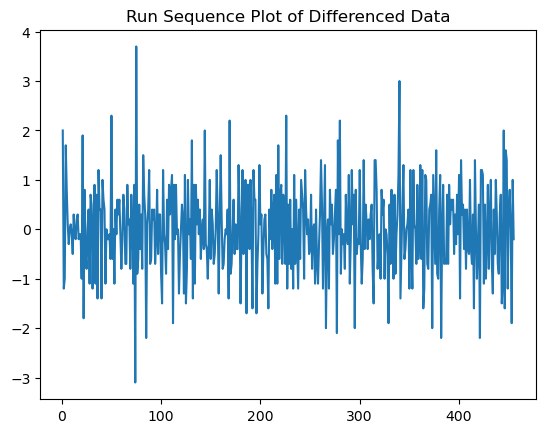

In [9]:
# Compute differences between consecutive data points
df['Differenced Data'] = df['Oscillation'].diff()

# Plot
plt.plot(df.index[1:], df['Differenced Data'][1:])  # Skip first index due to differencing
plt.title('Run Sequence Plot of Differenced Data')

plt.show()

In [10]:
df['Differenced Data'].mean()

-0.0008791208791208809

### Now , the data is stationary.The ACF and PACF plots of the differenced series can help in determining the order of the model.

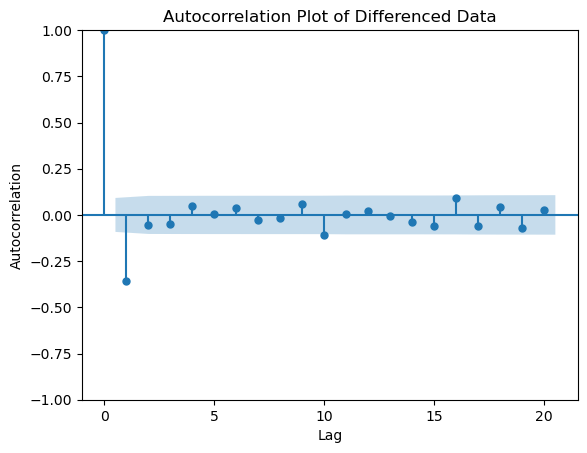

In [11]:
plot_acf(df['Differenced Data'].dropna(), lags=20)  # Adjust 'lags' as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot of Differenced Data')
plt.show()

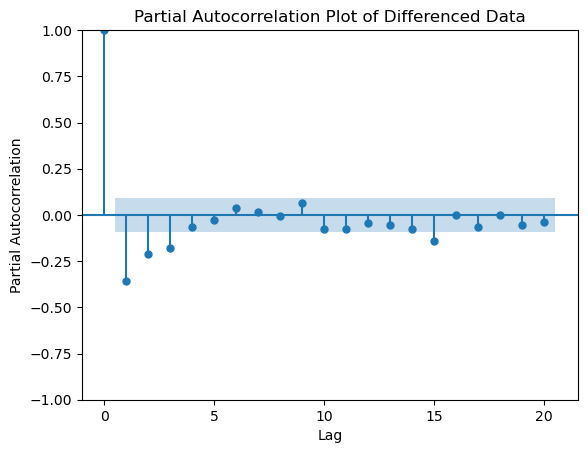

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf

# Compute differences between consecutive data points
df['Differenced Data'] = df['Oscillation'].diff()

# Plot partial autocorrelation function (PACF) of the differenced data
plot_pacf(df['Differenced Data'].dropna(), lags=20)  # Adjust 'lags' as needed
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Plot of Differenced Data')
plt.show()

### Partial Autocorelation plot -> value of p (AR) , (here p=3)
### Autocorelation plot -> value of q (MA) , (here q=1)
### if using differenced data 1 time then d=1 , else d=0

In [19]:
from statsmodels.tsa.arima.model import ARIMA

model1 = ARIMA(df["Oscillation"], order=(3, 0, 1))
model1_fit = model1.fit()

print(model1_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Oscillation   No. Observations:                  456
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -544.451
Date:                Wed, 29 May 2024   AIC                           1100.901
Time:                        15:35:04   BIC                           1125.636
Sample:                             0   HQIC                          1110.645
                                - 456                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1169      0.177     -0.659      0.510      -0.465       0.231
ar.L1          0.8624      0.292      2.953      0.003       0.290       1.435
ar.L2         -0.0430      0.150     -0.286      0.7

In [14]:
from statsmodels.tsa.arima.model import ARIMA

model2 = ARIMA(df["Oscillation"], order=(0, 0, 1))
model2_fit = model2.fit()

print(model2_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Oscillation   No. Observations:                  456
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -556.011
Date:                Wed, 29 May 2024   AIC                           1116.021
Time:                        13:47:59   BIC                           1124.262
Sample:                             0   HQIC                          1119.268
                                - 456                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5258      0.041    -12.943      0.000      -0.605      -0.446
sigma2         0.6740      0.039     17.235      0.000       0.597       0.751
Ljung-Box (L1) (Q):                   0.74   Jarque-

In [15]:
residuals=model1_fit.resid

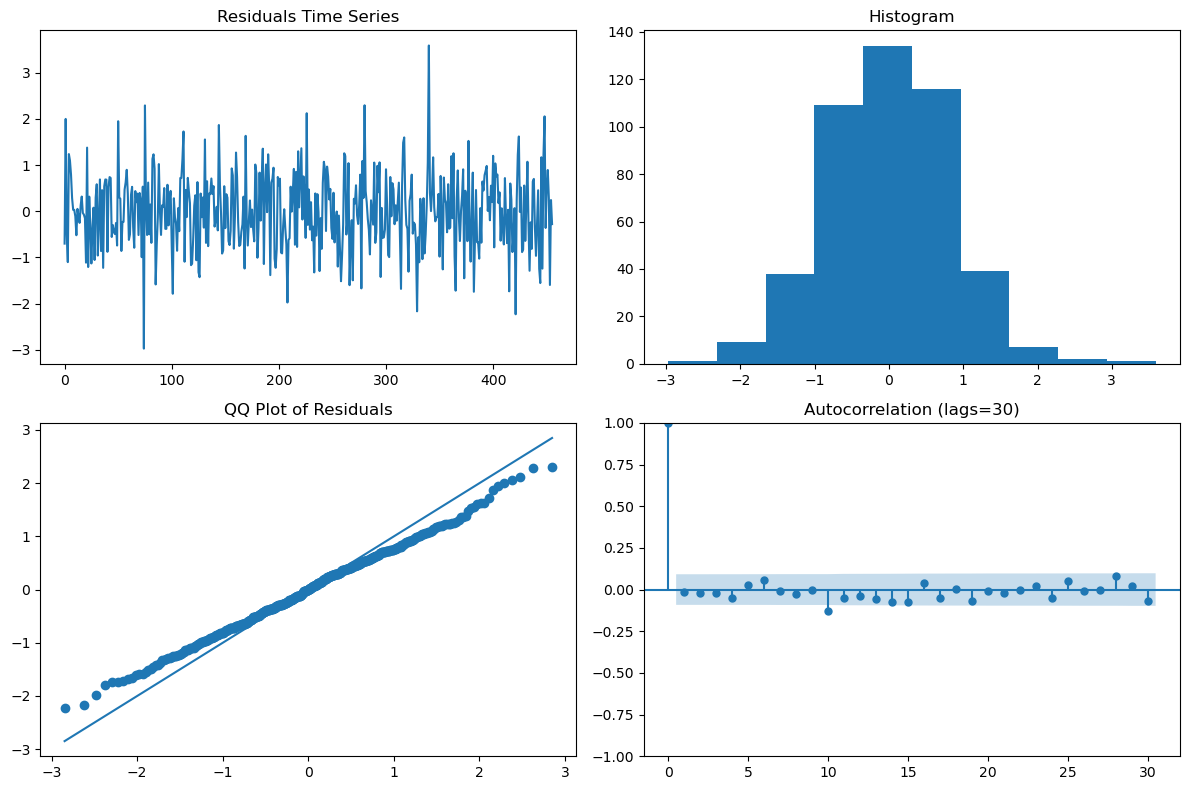

In [16]:
from scipy.stats import norm
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(residuals)
axes[0, 0].set_title("Residuals Time Series")

# Plot histogram on the second subplot
axes[0, 1].hist(residuals)
axes[0, 1].set_title("Histogram")

# QQ Plot on the third subplot
theoretical_quantiles = norm.ppf(np.linspace(0, 1, len(residuals)))
sample_quantiles = residuals.quantile(np.linspace(0, 1, len(residuals)))
axes[1, 0].scatter(theoretical_quantiles, sample_quantiles)
axes[1, 0].set_title("QQ Plot of Residuals")
axes[1, 0].plot(theoretical_quantiles, theoretical_quantiles)

# Autocorrelation plot on the fourth subplot
plot_acf(residuals, lags=30, ax=axes[1, 1])
axes[1, 1].set_title("Autocorrelation (lags=30)")

plt.tight_layout()
plt.show()

In [17]:
residuals2=model2_fit.resid

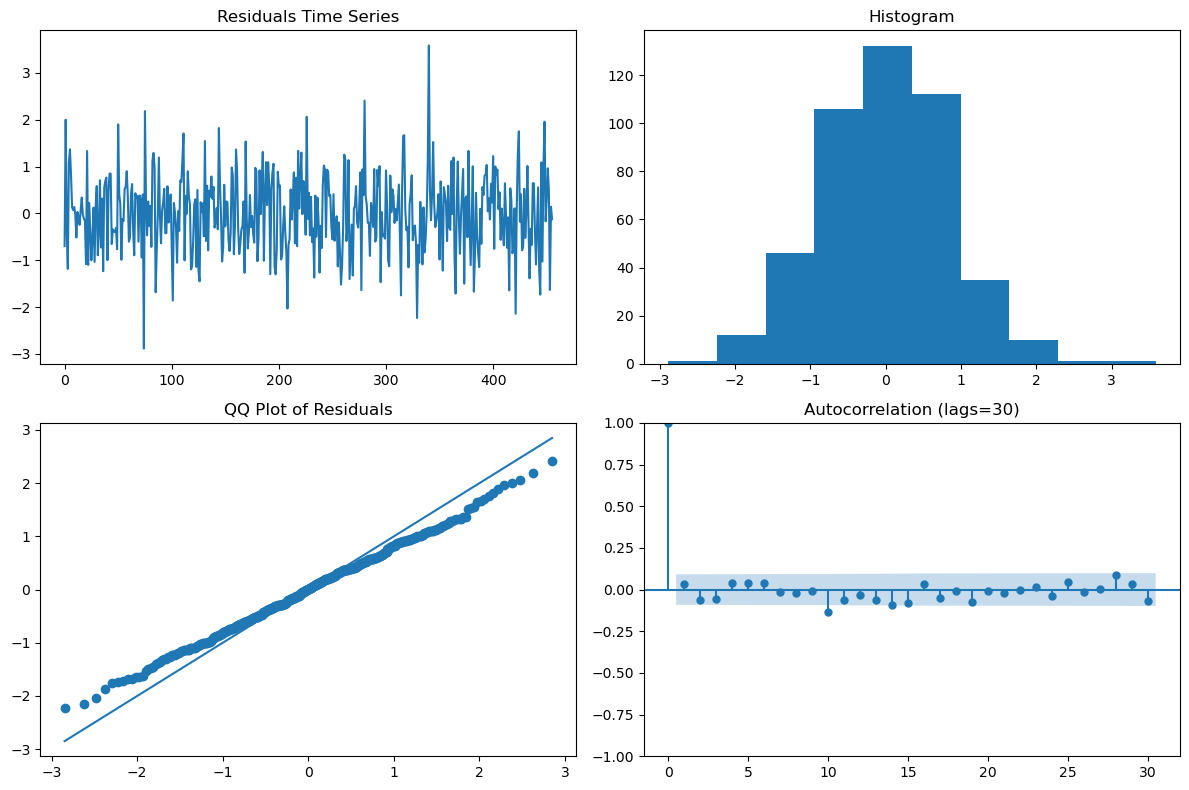

In [18]:
fig2, axes2 = plt.subplots(2, 2, figsize=(12, 8))

# Plot residuals time series on the first subplot
axes2[0, 0].plot(residuals2)
axes2[0, 0].set_title("Residuals Time Series")

# Plot histogram on the second subplot
axes2[0, 1].hist(residuals2)
axes2[0, 1].set_title("Histogram")

# QQ Plot on the third subplot
theoretical_quantiles = norm.ppf(np.linspace(0, 1, len(residuals2)))
sample_quantiles = residuals2.quantile(np.linspace(0, 1, len(residuals2)))
axes2[1, 0].scatter(theoretical_quantiles, sample_quantiles)
axes2[1, 0].set_title("QQ Plot of Residuals")
axes2[1, 0].plot(theoretical_quantiles, theoretical_quantiles)

# Autocorrelation plot on the fourth subplot
plot_acf(residuals2, lags=30, ax=axes2[1, 1])
axes2[1, 1].set_title("Autocorrelation (lags=30)")

plt.tight_layout() 
plt.show()

## hiii